# ETUDE DES DONNEES D'EMISSIONS DES GAZ A EFFET DE SERRE EN                                               FRANCE ENTRE 1990 ET 2019 

### Importation des librairies et/ou leur installation pour l'étude de nos données

In [2]:
#install.packages("ggplot2")

In [3]:
#install.packages("dplyr")

In [4]:
#install.packages("ISLR")

In [5]:
#install.packages("moments")

In [6]:
#install.packages("SmartEDA")

In [7]:
#install.packages("devtools")

In [8]:
#devtools::install_github('cargomoose/raptR', force = TRUE)


In [9]:
# install.packages("xlsx", lib = lib_path)

In [10]:
#install.packages("rJava",lib = lib_path)

In [11]:
#install.packages("tidyverse")
#devtools::install_github("tidyverse/tidyverse",lib_path)

In [12]:
#install.packages("fpp3")

In [13]:
#install.packages('Hmisc')

In [14]:
#install.packages("RColorBrewer")
#install.packages("ggrepel")

In [15]:
#install.packages("itsmr")

In [16]:
#install.packages("tseries")

In [1]:
install.packages("forecast")

also installing the dependencies 'fracdiff', 'lmtest', 'RcppArmadillo'




  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
lmtest            0.9-38     0.9-40              TRUE
RcppArmadillo 0.10.4.0.0 0.11.1.1.0              TRUE
forecast            8.14       8.16              TRUE

  Binaries will be installed
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MarieRogerNoahNoah\AppData\Local\Temp\RtmpkTcNGI\downloaded_packages


In [2]:
library(ggplot2)# package de visualisation
#library(fpp3)
library(dplyr)
library(tidyverse)
library(ISLR)
library(moments)#package pour le calcul des coefficients de skewness, 
#library(rJava)
library(xlsx)
#library(devtools)
library(ggraptR)
library(Hmisc)# pour le calcul de la matrice du test de correlation
library(RColorBrewer)
library(ggrepel)
library(itsmr)
library(tseries) # pour les séries temporelles
library(forecast)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggraptR' was built under R version 3.6.3"Loading required package: pacman
Warning message:
"package 'pacman' was built under R version 3.6.3"Loading required package: shiny
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required packa

### Emissions des gaz à effet de serre par grand secteur

#### Importation de la base de données

In [3]:
#setwd('C:\Users\MarieRogerNoahNoah\Documents\Projet IA\Gaz Renouvelable des territoires par département Renouvel')
#data1 = read.xlsx("C:/Users/MarieRogerNoahNoah/Documents/Projet IA/CITEPA-Liste-sources-2021-d.xlsx", sheetIndex = 6)
data1 = read.xlsx("C:/Users/MarieRogerNoahNoah/Documents/Projet IA/Emissions de gaz à effet de serre/recap_emissions_par_secteur.xlsx", sheetIndex = 1, header=TRUE)

#### Reconnaissance de la nature de la base de données

In [20]:
head(data1)

Annee,Industrie.de.l.Ã.nergie,Industrie.manufacturiÃ.re.et.construction,Traitement.centralisÃ..des.dÃ.chets,Usage.des.bÃ.timents.et.activitÃ.s.rÃ.sidentiels.tertiaires,Agriculture,Transports,Transport.hors.total,TOTAL.national.hors.UTCATF,UTCATF,UTCATF.Hors.total,Emissions.naturelles.hors.total,TOTAL.national.avec.UTCATF,Hors.total
1990,78.10127,143.3398,15.31023,91.64817,92.07324,123.5728,17.23061,544.0456,-21.91749,2.896731,0.02319658,522.1281,20.15053
1991,79.38530,155.7497,15.86877,101.10681,91.62043,126.3383,17.16710,570.0693,-22.03750,2.913581,0.02319658,548.0318,20.10387
1992,80.63972,143.6916,16.56260,97.27959,90.47726,130.7914,18.28198,559.4422,-19.82281,2.903544,0.13348238,539.6194,21.31900
1993,68.32893,138.6403,17.25716,93.69815,89.59648,131.0509,18.33645,538.5719,-22.78431,2.947054,0.00000000,515.7876,21.28350
1994,65.22400,139.5984,17.54523,87.36689,89.05558,131.9613,17.89895,530.7515,-20.34838,2.983898,0.00000000,510.4031,20.88285
1995,67.76534,140.0690,17.69849,87.27171,89.87920,133.8745,18.21886,536.5583,-22.72314,2.988319,0.00000000,513.8352,21.20718


In [4]:
# renommination des colonnes
colnames(data1) <- c("Annee","Industrie.de.energie","Industrie.manufacturiere.construstion","Traitement.centralise.déchets","Usage.bâtiments.activite.residentiels.tertiaires","Agriculture","Transports","Transports.hors.Total","Total.national.hors.UTCATF","UTCATF","UTCATF.hors.total","Emissions.naturelles.hors.total","Total.national.UTCATF","Hors.Total")

In [22]:
#véfication de la renommination des colonnes
head(data1)

Annee,Industrie.de.energie,Industrie.manufacturiere.construstion,Traitement.centralise.déchets,Usage.bâtiments.activite.residentiels.tertiaires,Agriculture,Transports,Transports.hors.Total,Total.national.hors.UTCATF,UTCATF,UTCATF.hors.total,Emissions.naturelles.hors.total,Total.national.UTCATF,Hors.Total
1990,78.10127,143.3398,15.31023,91.64817,92.07324,123.5728,17.23061,544.0456,-21.91749,2.896731,0.02319658,522.1281,20.15053
1991,79.38530,155.7497,15.86877,101.10681,91.62043,126.3383,17.16710,570.0693,-22.03750,2.913581,0.02319658,548.0318,20.10387
1992,80.63972,143.6916,16.56260,97.27959,90.47726,130.7914,18.28198,559.4422,-19.82281,2.903544,0.13348238,539.6194,21.31900
1993,68.32893,138.6403,17.25716,93.69815,89.59648,131.0509,18.33645,538.5719,-22.78431,2.947054,0.00000000,515.7876,21.28350
1994,65.22400,139.5984,17.54523,87.36689,89.05558,131.9613,17.89895,530.7515,-20.34838,2.983898,0.00000000,510.4031,20.88285
1995,67.76534,140.0690,17.69849,87.27171,89.87920,133.8745,18.21886,536.5583,-22.72314,2.988319,0.00000000,513.8352,21.20718


In [23]:
#le type des variables dela base de données
str(data1)

'data.frame':	61 obs. of  14 variables:
 $ Annee                                           : Factor w/ 61 levels "1990","1991",..: 1 2 4 6 8 10 12 14 16 18 ...
 $ Industrie.de.energie                            : num  78.1 79.4 80.6 68.3 65.2 ...
 $ Industrie.manufacturiere.construstion           : num  143 156 144 139 140 ...
 $ Traitement.centralise.déchets                   : num  15.3 15.9 16.6 17.3 17.5 ...
 $ Usage.bâtiments.activite.residentiels.tertiaires: num  91.6 101.1 97.3 93.7 87.4 ...
 $ Agriculture                                     : num  92.1 91.6 90.5 89.6 89.1 ...
 $ Transports                                      : num  124 126 131 131 132 ...
 $ Transports.hors.Total                           : num  17.2 17.2 18.3 18.3 17.9 ...
 $ Total.national.hors.UTCATF                      : num  544 570 559 539 531 ...
 $ UTCATF                                          : num  -21.9 -22 -19.8 -22.8 -20.3 ...
 $ UTCATF.hors.total                               : num  2.9 2.91 2

In [5]:
# changement de la colonne Date en format date
data1$Annee = as.Date(data1$Annee, format ="%Y") # convertir en date
#str(data1) # pour vérifier si le format date a été appliqué

In [25]:
# Etude statistique des variables
summary(data1)

     Annee            Industrie.de.energie
 Min.   :1990-05-20   Min.   :38.36       
 1st Qu.:1998-05-20   1st Qu.:57.65       
 Median :2005-05-20   Median :67.20       
 Mean   :2005-08-17   Mean   :63.74       
 3rd Qu.:2013-05-20   3rd Qu.:70.50       
 Max.   :2020-05-20   Max.   :80.64       
 Industrie.manufacturiere.construstion Traitement.centralise.déchets
 Min.   : 75.78                        Min.   :15.04                
 1st Qu.: 91.66                        1st Qu.:16.52                
 Median :119.97                        Median :17.60                
 Mean   :114.88                        Mean   :17.27                
 3rd Qu.:134.81                        3rd Qu.:18.50                
 Max.   :155.75                        Max.   :18.87                
 Usage.bâtiments.activite.residentiels.tertiaires  Agriculture   
 Min.   : 69.94                                   Min.   :82.95  
 1st Qu.: 87.27                                   1st Qu.:86.11  
 Median : 94.42   

In [27]:
#création d'une nouvelle base de données avec les secteurs d'activités intéressantes pour notre études
#étape importante
#data = as.matrix(data1[30,2:7])
data1.1 = as.matrix(data1[30,2:7])
data1.1

,Industrie.de.energie,Industrie.manufacturiere.construstion,Traitement.centralise.déchets,Usage.bâtiments.activite.residentiels.tertiaires,Agriculture,Transports
30,42.47956,84.24711,15.28486,75.0531,83.06621,135.8678


In [28]:
# Changement des noms des colonnes de la nouvelle base
colnames(data1.1) <-c("Energie","Manu.Cons","Déchets","Bâtiments","Agriculture","Transports") 
data1.1

,Energie,Manu.Cons,Déchets,Bâtiments,Agriculture,Transports
30,42.47956,84.24711,15.28486,75.0531,83.06621,135.8678


In [6]:
data1.2 = data1[,c(1,9)]
head(data1.2)

Annee,Total.national.hors.UTCATF
1990-05-20,544.0456
1991-05-20,570.0693
1992-05-20,559.4422
1993-05-20,538.5719
1994-05-20,530.7515
1995-05-20,536.5583


In [7]:
# Total national d'émissions des GES sans l'année 2020(estimation)
data1.3 = data1[-61,c(1,9)]
head(data1.3)

Annee,Total.national.hors.UTCATF
1990-05-20,544.0456
1991-05-20,570.0693
1992-05-20,559.4422
1993-05-20,538.5719
1994-05-20,530.7515
1995-05-20,536.5583


#### VISUALISATION DES DONNEES

In [32]:
# création dema palette de couleur pour les graphes
#palette_Dark2 <- colorRampPalette(brewer.pal(14, "Dark2"))
mycolors = c("red","green","yellow","orange","magenta","cyan","brown","aquamarine","darkgreen","deeppink","darkgrey","chocolate","darkolivegreen","darkmagenta","salmon")

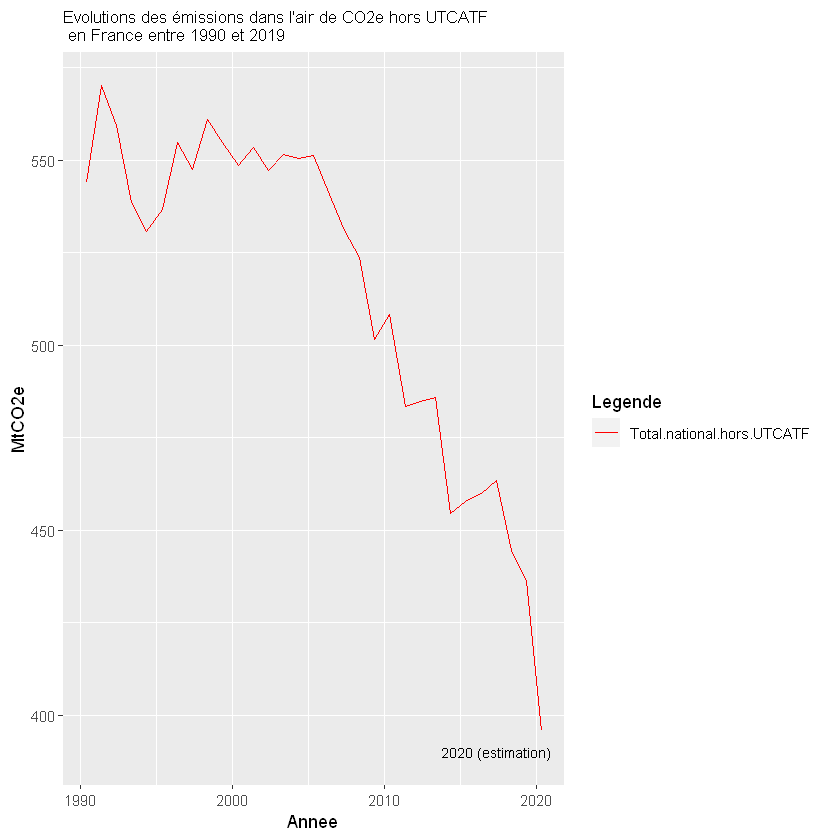

In [117]:
ggplot(data1.2, aes(x=Annee)) + 
                geom_line(aes(y = Total.national.hors.UTCATF,colour = "Total.national.hors.UTCATF")) +
                #geom_smooth(aes(y= Total.national.hors.UTCATF),method='lm') +
                ylab("MtCO2e") +
                ggtitle("Evolutions des émissions dans l'air de CO2e hors UTCATF \n en France entre 1990 et 2019")+
                theme(plot.title = element_text(size = 10))+
                geom_text(data = NULL, aes(x = Annee[28], y = 390, label = "2020 (estimation)"),size=3) +
                scale_color_manual(name="Legende",values = mycolors) 
                #labs(color = "Legende") 
                #scale_color_manual(values = colors)  

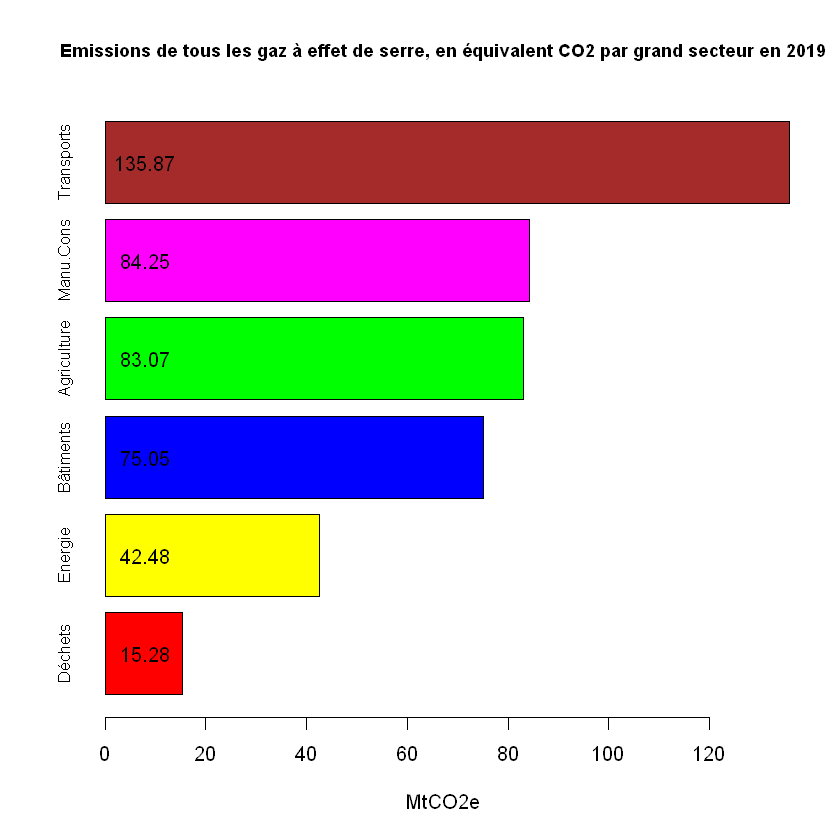

In [34]:
bar1 = barplot(data1.1[order(data1.1)],width = 1,
#bp_data1=barplot(sort(as.matrix(data1[30,2:7],decreasing = TRUE)),
main = ("Emissions de tous les gaz à effet de serre, en équivalent CO2 par grand secteur en 2019"),
xlab = "MtCO2e",
#ylab = "Day",
names.arg = c("Energie","Manu.Cons","Déchets","Bâtiments","Agriculture","Transports")[order(data1.1)],
#names.arg=colnames(data)[order(data)],
#names.arg= names(data[,2:7]),
cex.main=0.9,#cex.axis=1.7
cex.names = 0.8,
col = c("red","yellow","blue","green","magenta","brown"),
horiz = TRUE)
#text(0.1, bar1, y =data1.1[order(data1.1)])
text(bar1,x=8,labels = round(data1.1[order(data1.1)], digits = 2),cex=1)# étiquette sur les barres
#text(x = data1.1[order(data1.1)], pos = 2)
#text(bar1, sort(data1.1, decreasing=T) + 3.5, sort(data1.1, decreasing = T))
#axis(2, at = bp_secteurs, labels = names(data)[order(data, decreasing = TRUE)])
#axis(2, at = bp_data1, labels = names(data[,2:7])[order(data[,2:7], decreasing = TRUE)])

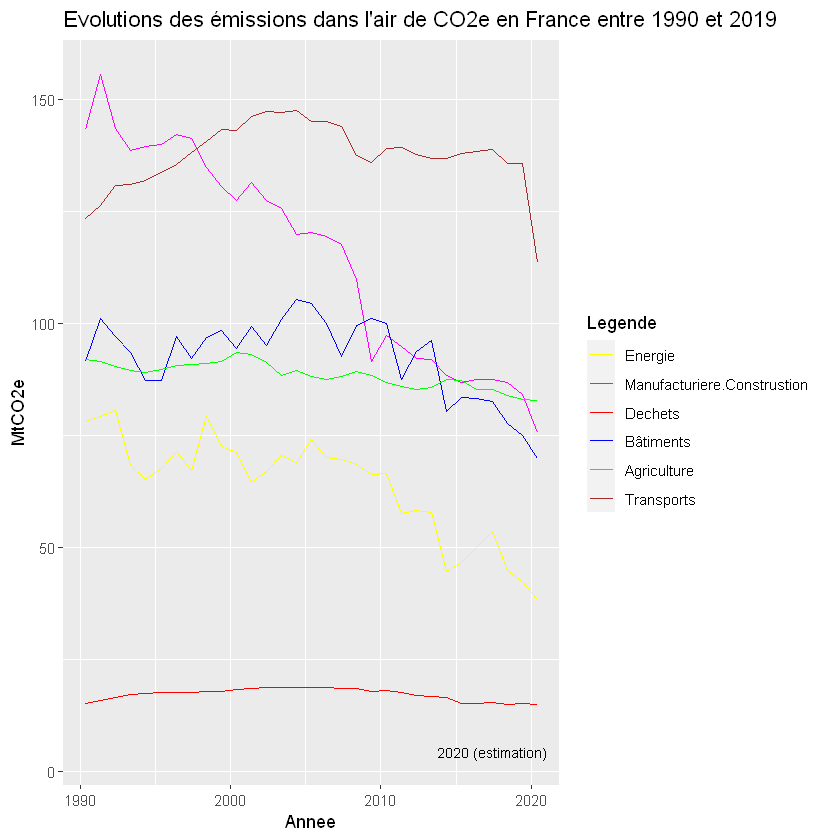

In [35]:
 #ggplot(data1)+aes(x=Annee, y=Industrie.de.energie)+geom_line(colour="yellow")+ 
  #            aes(x=Annee, y=Industrie.manufacturiere.construstion)+geom_line(colour="magenta")
ggplot(data1, aes(x=Annee)) + 
                geom_line(aes(y = Industrie.de.energie,colour = "Energie")) +
                geom_line(aes(y = Industrie.manufacturiere.construstion,colour = "Manufacturiere.Construstion")) +
                geom_line(aes(y = Traitement.centralise.déchets, colour = "Dechets")) +
                geom_line(aes(y = Usage.bâtiments.activite.residentiels.tertiaires, colour = "Bâtiments"))+
                geom_line(aes(y= Agriculture, colour="Agriculture")) +
                geom_line(aes(y= Transports, colour = "Transports")) +
                ylab("MtCO2e") +
                ggtitle("Evolutions des émissions dans l'air de CO2e en France entre 1990 et 2019")+
                geom_text(data = NULL, aes(x = Annee[28], y = 4.5, label = "2020 (estimation)"),size=3) +
                scale_color_manual(name="Legende",values = c("Energie"="yellow","Manufacturiere.Construstion"="magenta","Dechets"="red","Bâtiments"="blue","Agriculture"="green","Transports"="brown")) 
                #labs(color = "Legende") 
                #scale_color_manual(values = colors)              

#### Test statistique

In [36]:
rcorr(as.matrix(data1[,2:7]))# matrice du test de corrélation

                                                 Industrie.de.energie
Industrie.de.energie                                             1.00
Industrie.manufacturiere.construstion                            0.85
Traitement.centralise.déchets                                    0.64
Usage.bâtiments.activite.residentiels.tertiaires                 0.84
Agriculture                                                      0.78
Transports                                                       0.27
                                                 Industrie.manufacturiere.construstion
Industrie.de.energie                                                              0.85
Industrie.manufacturiere.construstion                                             1.00
Traitement.centralise.déchets                                                     0.46
Usage.bâtiments.activite.residentiels.tertiaires                                  0.56
Agriculture                                                                

In [37]:
# test de corrélation entre l'industrie du transport et le bâtiment
cor.test(data1$Usage.bâtiments.activite.residentiels.tertiaires,data1$Transports)


	Pearson's product-moment correlation

data:  data1$Usage.bâtiments.activite.residentiels.tertiaires and data1$Transports
t = 4.5503, df = 59, p-value = 2.724e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2958276 0.6748807
sample estimates:
      cor 
0.5096795 


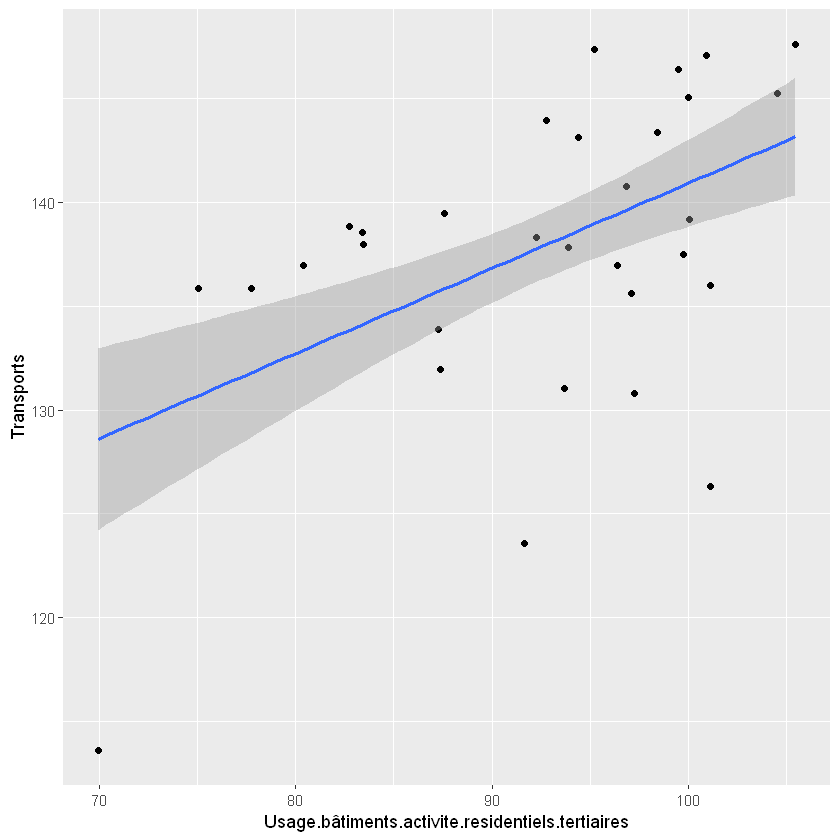

In [38]:
ggplot(data1)+aes(x=Usage.bâtiments.activite.residentiels.tertiaires,y=Transports)+geom_point()+
 geom_smooth( formula = y~x ,method="lm")

In [39]:
regression1 = lm(data1$Usage.bâtiments.activite.residentiels.tertiaires~data1$Transports)
summary(regression1)


Call:
lm(formula = data1$Usage.bâtiments.activite.residentiels.tertiaires ~ 
    data1$Transports)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.197  -5.950   1.575   6.022  15.895 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.1522    19.2231   0.268     0.79    
data1$Transports   0.6337     0.1393   4.550 2.72e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.748 on 59 degrees of freedom
Multiple R-squared:  0.2598,	Adjusted R-squared:  0.2472 
F-statistic: 20.71 on 1 and 59 DF,  p-value: 2.724e-05


In [40]:
# test de corrélation entre l'industrie entre l'industrie du transport et l'énergie
cor.test(data1$Transports,data1$Industrie.de.energie)


	Pearson's product-moment correlation

data:  data1$Transports and data1$Industrie.de.energie
t = 2.1178, df = 59, p-value = 0.03842
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01497662 0.48514371
sample estimates:
      cor 
0.2657949 


p-value = 0.03842 < 0.05, donc il y'a une faible corrélation entre les deux variables

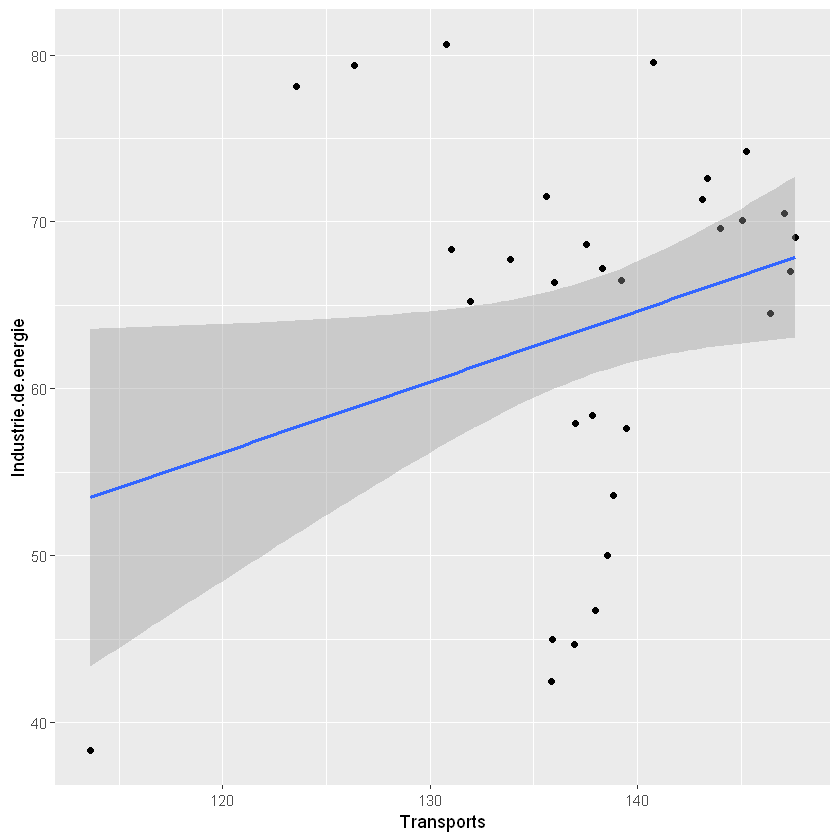

In [41]:
ggplot(data1)+aes(x=Transports, y=Industrie.de.energie)+geom_point()+
 geom_smooth( formula = y~x ,method="lm")

In [42]:
regression2 = lm(data1$Transports~data1$Industrie.de.energie)
summary(regression2)


Call:
lm(formula = data1$Transports ~ data1$Industrie.de.energie)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.993  -2.299   1.151   4.047   8.973 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                127.22182    5.09786  24.956   <2e-16 ***
data1$Industrie.de.energie   0.16675    0.07874   2.118   0.0384 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.983 on 59 degrees of freedom
Multiple R-squared:  0.07065,	Adjusted R-squared:  0.0549 
F-statistic: 4.485 on 1 and 59 DF,  p-value: 0.03842


In [43]:
# test de corrélation entre l'industrie de l'énergie et le bâtiment
cor.test(data1$Usage.bâtiments.activite.residentiels.tertiaires,data1$Industrie.de.energie)


	Pearson's product-moment correlation

data:  data1$Usage.bâtiments.activite.residentiels.tertiaires and data1$Industrie.de.energie
t = 11.982, df = 59, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7487857 0.9023814
sample estimates:
      cor 
0.8418646 


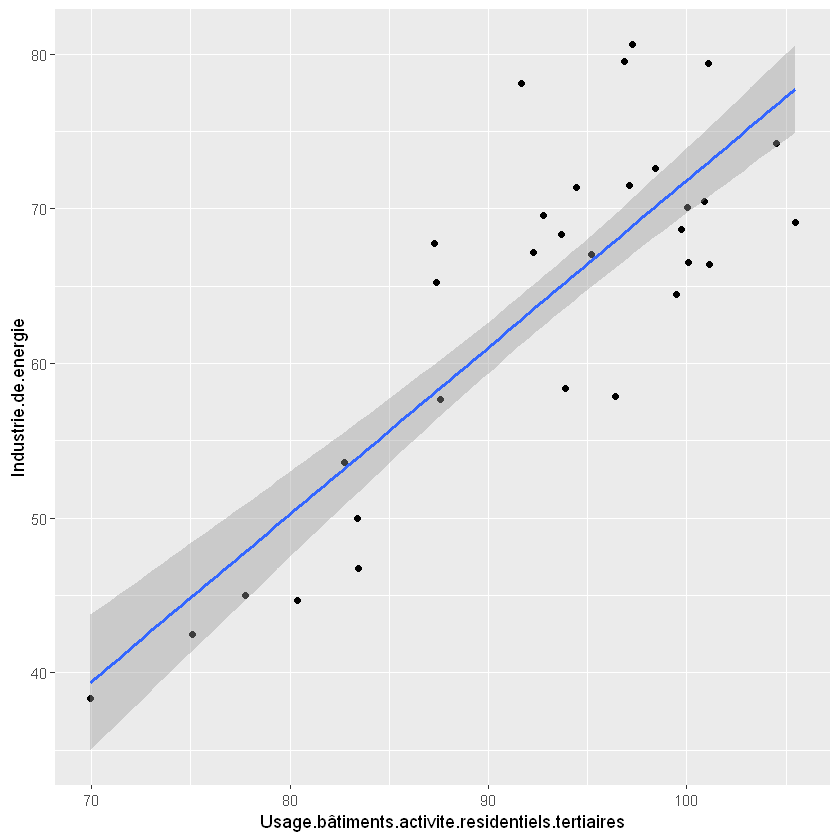

In [44]:
ggplot(data1)+aes(x=Usage.bâtiments.activite.residentiels.tertiaires, y=Industrie.de.energie)+geom_point()+
 geom_smooth( formula = y~x ,method="lm")

In [45]:
regression3 = lm(data1$Usage.bâtiments.activite.residentiels.tertiaires~data1$Industrie.de.energie)
summary(regression3)


Call:
lm(formula = data1$Usage.bâtiments.activite.residentiels.tertiaires ~ 
    data1$Industrie.de.energie)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2874  -3.1509  -0.4977   3.9934   9.4582 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 50.6504     3.5483   14.28   <2e-16 ***
data1$Industrie.de.energie   0.6566     0.0548   11.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.86 on 59 degrees of freedom
Multiple R-squared:  0.7087,	Adjusted R-squared:  0.7038 
F-statistic: 143.6 on 1 and 59 DF,  p-value: < 2.2e-16


#### Prédiction de l'émission total des gaz à effet de serre hors UTCATF

In [46]:
str(data1.3)

'data.frame':	60 obs. of  2 variables:
 $ Annee                     : Date, format: "1990-05-20" "1991-05-20" ...
 $ Total.national.hors.UTCATF: num  544 570 559 539 531 ...


In [8]:
#MtCO2e_st  = ts(data1.3$Total.national.hors.UTCATF, start = c(1990,05,17),frequency = 1)
MtCO2e_st  = ts(data1.3$Total.national.hors.UTCATF, start = c(1990,05,17), end = c(2019,05,17),frequency = 1)
#print(MtCO2e_st)

In [48]:
print(MtCO2e_st)

Time Series:
Start = 1994 
End = 2023 
Frequency = 1 
 [1] 544.0456 570.0693 559.4422 538.5719 530.7515 536.5583 554.8634 547.5775
 [9] 560.9235 554.6414 548.4401 553.5496 547.2839 551.5388 550.4363 551.2348
[17] 540.7587 530.8858 523.7099 501.6457 508.1790 483.4148 484.8006 485.7802
[25] 454.6228 457.6506 460.0247 463.4541 444.5899 435.9986


In [49]:
#pour vérifier que le dataframe est une série temporelle
is.ts(MtCO2e_st)

[1] TRUE

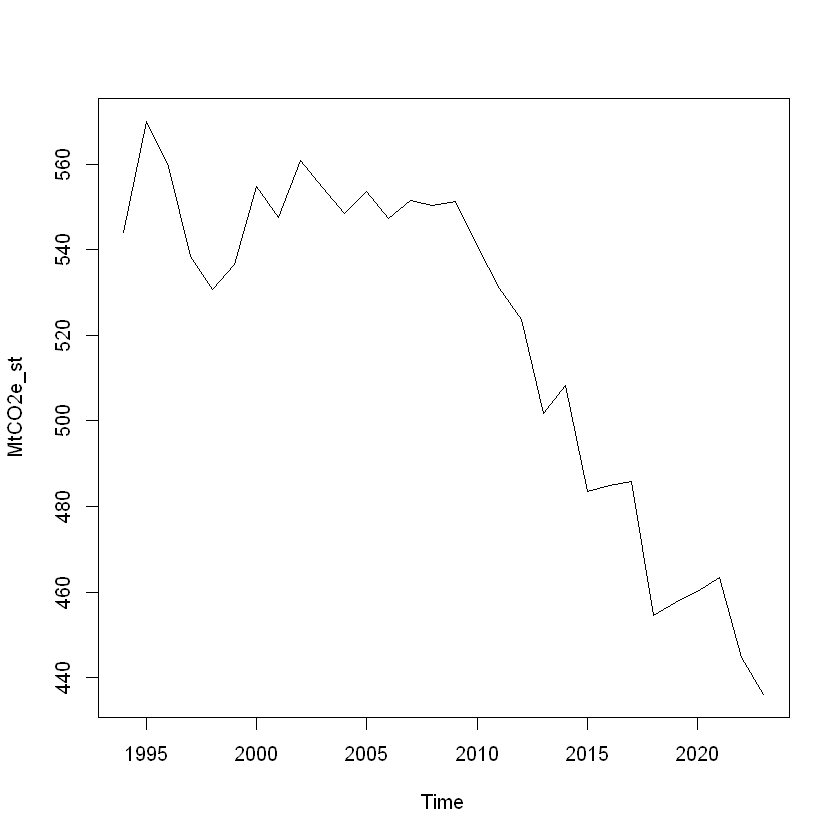

In [9]:
plot.ts(MtCO2e_st)

In [51]:
# test de stationnarité
adf.test(MtCO2e_st)


	Augmented Dickey-Fuller Test

data:  MtCO2e_st
Dickey-Fuller = -1.3617, Lag order = 3, p-value = 0.8179
alternative hypothesis: stationary


#### Prédiction de l'émission des GES hors UCTAF

In [10]:
MtCO2e.hw = HoltWinters(MtCO2e_st,beta = FALSE, gamma = FALSE)# pour le lissage
MtCO2e.hw

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = MtCO2e_st, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9541179
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 436.4322

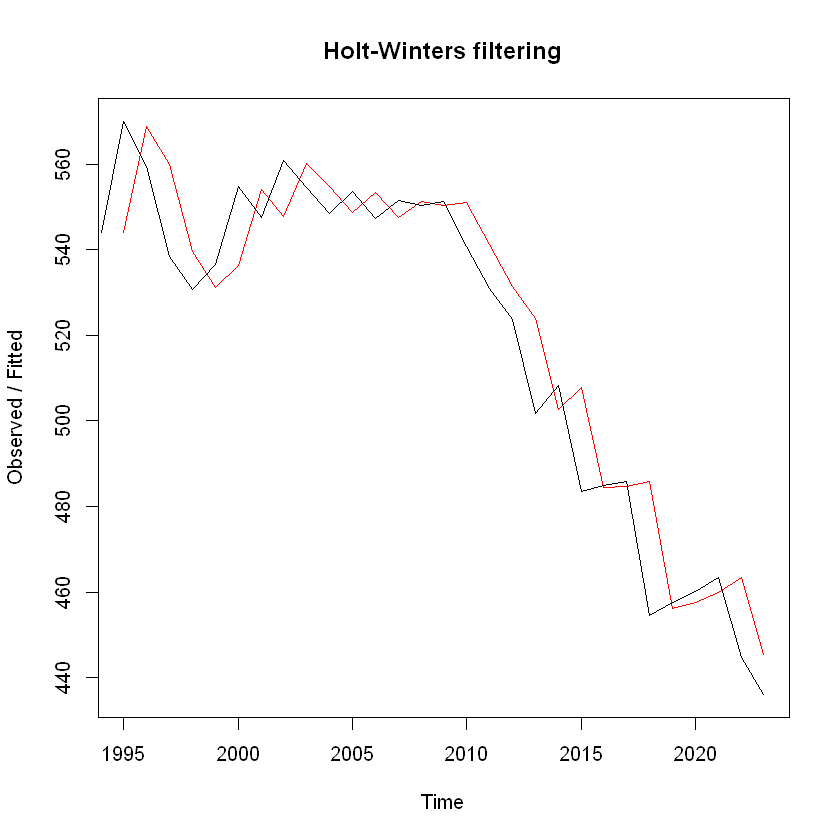

In [11]:
plot(MtCO2e.hw)

In [16]:
p=predict(MtCO2e.hw,prediction.interval=TRUE) #pour la prévision
print(p)

Time Series:
Start = 2024 
End = 2024 
Frequency = 1 
          fit      upr      lwr
2024 436.4322 461.0918 411.7726


In [12]:
#p=predict(MtCO2e.hw, 24, prediction.interval = TRUE, level=0.95)

In [14]:
#p=predict(MtCO2e.hw,n.ahead=12)

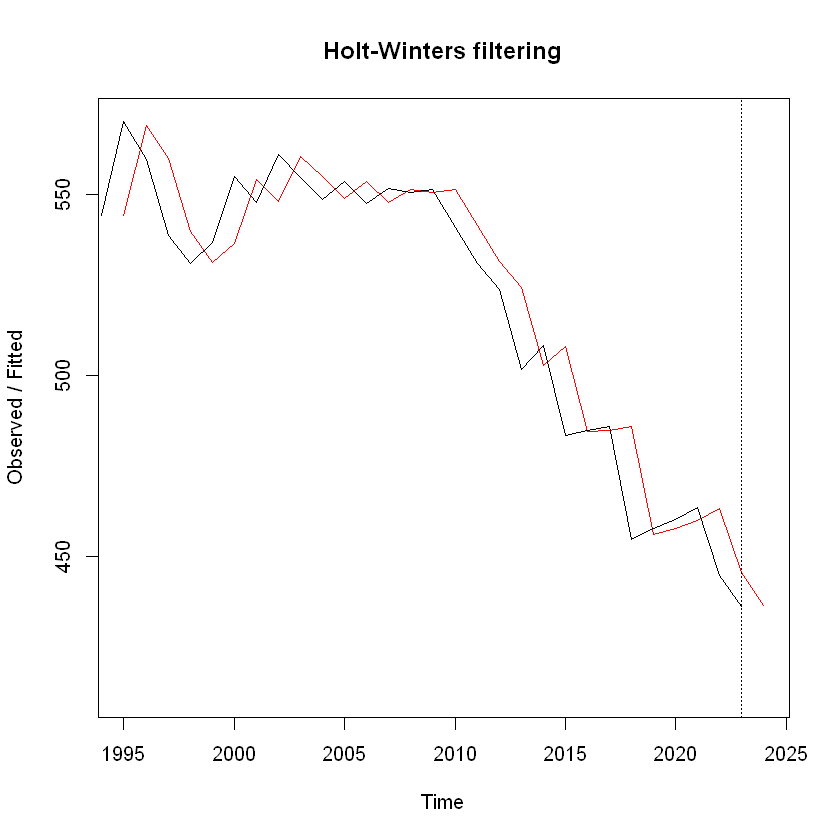

In [17]:
plot(MtCO2e.hw,p)

In [ ]:
Figure9

In [58]:
#plotc(MtCO2e_st)

In [59]:
out<-arima(MtCO2e_st,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=12))

In [60]:
summary(out)

          Length Class  Mode     
coef       2     -none- numeric  
sigma2     1     -none- numeric  
var.coef   4     -none- numeric  
mask       2     -none- logical  
loglik     1     -none- numeric  
aic        1     -none- numeric  
arma       7     -none- numeric  
residuals 30     ts     numeric  
call       4     -none- call     
series     1     -none- character
code       1     -none- numeric  
n.cond     1     -none- numeric  
nobs       1     -none- numeric  
model     10     -none- list     

### Emissions des gaz à effet de serre dans le secteur de l'industrie de l'énergie

#### Importation de la base de données

In [61]:
data2=read.xlsx("C:/Users/MarieRogerNoahNoah/Documents/Projet IA/Emissions de gaz à effet de serre/secteur_de_energie.xlsx", sheetIndex = 1, header=TRUE)

In [62]:
head(data2)

Annee,Production.d.Ã.lectricitÃ.,Chauffage.urbain,Raffinage.du.pÃ.trole,Transformation.des.combustibles.minÃ.raux.solides,Extraction.et.distribution.de.combustibles.solides,Extraction.et.distribution.de.combustibles.liquides,Extraction.et.distribution.de.combustibles.gazeux,Extraction.et.distribution.de.combustibles...autres,Autres.secteurs.de.l.industrie.de.l.Ã.nergie,dont.incinÃ.ration.des.dÃ.chets.avec.rÃ.cupÃ.ration.d.Ã.nergie,Total.Industrie.de.l.Ã.nergie
1990,41.36146,6.021286,15.25142,4.176454,4.780450,0.4436044,3.283028,0,2.783563,0.1915884,78.10127
1991,41.48946,6.744192,15.52963,4.190813,4.436193,0.4337511,3.524995,0,3.036270,0.2094416,79.38530
1992,42.42318,6.607926,15.69741,4.211276,4.632816,0.4217121,3.356417,0,3.288977,0.2272948,80.63972
1993,30.15192,6.581251,15.68948,3.823803,4.839788,0.4059632,3.293240,0,3.543482,0.2452734,68.32893
1994,26.63518,6.183419,16.39439,3.729060,4.948045,0.4089182,3.359791,0,3.565205,0.2470235,65.22400
1995,29.24226,6.162415,16.54443,3.755786,4.903101,0.3676888,3.202735,0,3.586928,0.2487735,67.76534


In [63]:
colnames(data2) <- c("Annee","Production.electricite","chauffage.urbain","raffinage.petrole","Transformations.combustibles.mineraux","Extra.Dist.combus.sol","Extra.Dist.combus.liq","Extra.Dist.combus.gaz","Extra.Dist.combus.autre","autre.sect.energie","recup.energie","Total.secteur")

In [64]:
head(data2)

Annee,Production.electricite,chauffage.urbain,raffinage.petrole,Transformations.combustibles.mineraux,Extra.Dist.combus.sol,Extra.Dist.combus.liq,Extra.Dist.combus.gaz,Extra.Dist.combus.autre,autre.sect.energie,recup.energie,Total.secteur
1990,41.36146,6.021286,15.25142,4.176454,4.780450,0.4436044,3.283028,0,2.783563,0.1915884,78.10127
1991,41.48946,6.744192,15.52963,4.190813,4.436193,0.4337511,3.524995,0,3.036270,0.2094416,79.38530
1992,42.42318,6.607926,15.69741,4.211276,4.632816,0.4217121,3.356417,0,3.288977,0.2272948,80.63972
1993,30.15192,6.581251,15.68948,3.823803,4.839788,0.4059632,3.293240,0,3.543482,0.2452734,68.32893
1994,26.63518,6.183419,16.39439,3.729060,4.948045,0.4089182,3.359791,0,3.565205,0.2470235,65.22400
1995,29.24226,6.162415,16.54443,3.755786,4.903101,0.3676888,3.202735,0,3.586928,0.2487735,67.76534


In [65]:
data2$Annee = as.Date(data2$Annee, format ="%Y")

In [66]:
str(data2)

'data.frame':	61 obs. of  12 variables:
 $ Annee                                : Date, format: "1990-05-20" "1991-05-20" ...
 $ Production.electricite               : num  41.4 41.5 42.4 30.2 26.6 ...
 $ chauffage.urbain                     : num  6.02 6.74 6.61 6.58 6.18 ...
 $ raffinage.petrole                    : num  15.3 15.5 15.7 15.7 16.4 ...
 $ Transformations.combustibles.mineraux: num  4.18 4.19 4.21 3.82 3.73 ...
 $ Extra.Dist.combus.sol                : num  4.78 4.44 4.63 4.84 4.95 ...
 $ Extra.Dist.combus.liq                : num  0.444 0.434 0.422 0.406 0.409 ...
 $ Extra.Dist.combus.gaz                : num  3.28 3.52 3.36 3.29 3.36 ...
 $ Extra.Dist.combus.autre              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ autre.sect.energie                   : num  2.78 3.04 3.29 3.54 3.57 ...
 $ recup.energie                        : num  0.192 0.209 0.227 0.245 0.247 ...
 $ Total.secteur                        : num  78.1 79.4 80.6 68.3 65.2 ...


In [67]:
#suppression de la colonne Extra.Dist.combus.autre car ne contient que des valeurs nulles.
data2.1 = data2[,-9]
head(data2.1)
#data2.1

Annee,Production.electricite,chauffage.urbain,raffinage.petrole,Transformations.combustibles.mineraux,Extra.Dist.combus.sol,Extra.Dist.combus.liq,Extra.Dist.combus.gaz,autre.sect.energie,recup.energie,Total.secteur
1990-05-20,41.36146,6.021286,15.25142,4.176454,4.780450,0.4436044,3.283028,2.783563,0.1915884,78.10127
1991-05-20,41.48946,6.744192,15.52963,4.190813,4.436193,0.4337511,3.524995,3.036270,0.2094416,79.38530
1992-05-20,42.42318,6.607926,15.69741,4.211276,4.632816,0.4217121,3.356417,3.288977,0.2272948,80.63972
1993-05-20,30.15192,6.581251,15.68948,3.823803,4.839788,0.4059632,3.293240,3.543482,0.2452734,68.32893
1994-05-20,26.63518,6.183419,16.39439,3.729060,4.948045,0.4089182,3.359791,3.565205,0.2470235,65.22400
1995-05-20,29.24226,6.162415,16.54443,3.755786,4.903101,0.3676888,3.202735,3.586928,0.2487735,67.76534


In [68]:
# création d'un data frame sur l'émission des gaz à effet de serre seulement pour 2019 
data2.1 = as.matrix(data2.1[30,2:10])

In [69]:
#Visualisation de la nouvelle base de données
data2.1

,Production.electricite,chauffage.urbain,raffinage.petrole,Transformations.combustibles.mineraux,Extra.Dist.combus.sol,Extra.Dist.combus.liq,Extra.Dist.combus.gaz,autre.sect.energie,recup.energie
30,19.90092,3.891685,8.723585,2.858197,0.01005,0.1077839,1.47211,5.515227,0.126226


In [70]:
data2.2 =data.frame(
                    sous_secteur = c("Production.electricite","chauffage.urbain","raffinage.petrole","Transformations.combustibles.mineraux","Extra.Dist.combus.sol","Extra.Dist.combus.liq","Extra.Dist.combus.gaz","autre.sect.energie","recup.energie"),
                    MtCO2e = c(19.90092,3.891685,8.723585,2.858197,0.01005,0.1077839,1.47211,5.515227,0.126226)
)

#colnames(data2.2) <- ("MtCO2e")
data2.2

sous_secteur,MtCO2e
Production.electricite,19.9009200
chauffage.urbain,3.8916850
raffinage.petrole,8.7235850
Transformations.combustibles.mineraux,2.8581970
Extra.Dist.combus.sol,0.0100500
Extra.Dist.combus.liq,0.1077839
Extra.Dist.combus.gaz,1.4721100
autre.sect.energie,5.5152270
recup.energie,0.1262260


#### Visualisations des données

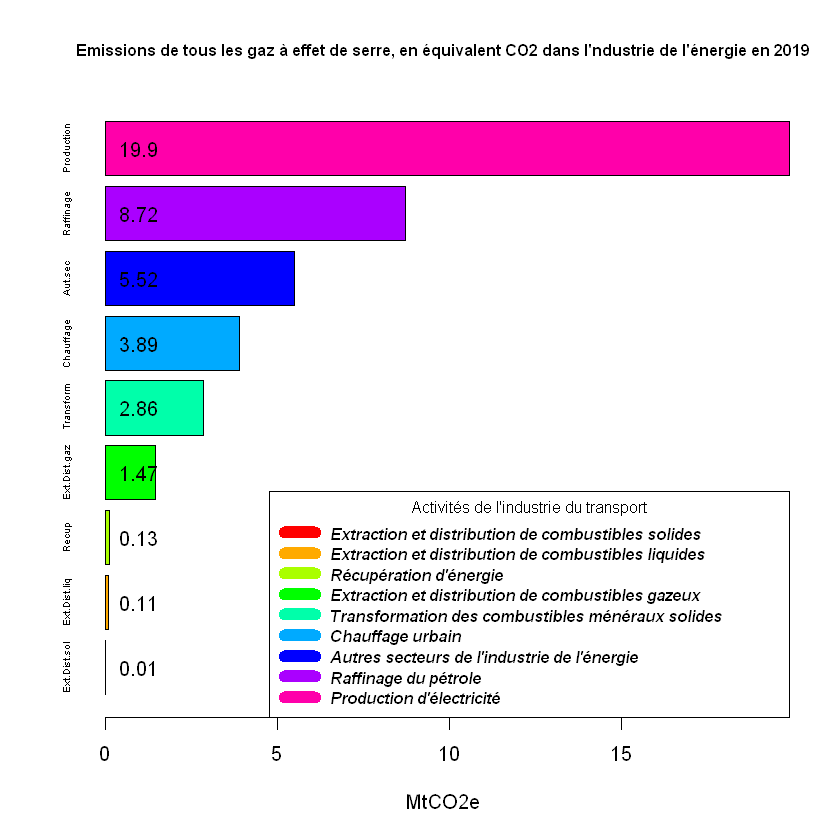

In [71]:
bar2 = barplot(data2.1[order(data2.1)],width = 1,
#bp_data1=barplot(sort(as.matrix(data1[30,2:7],decreasing = TRUE)),
main = ("Emissions de tous les gaz à effet de serre, en équivalent CO2 dans l'ndustrie de l'énergie en 2019"),
xlab = "MtCO2e",
#ylab = "Day",
names.arg = c("Production","Chauffage","Raffinage","Transform","Ext.Dist.sol","Ext.Dist.liq","Ext.Dist.gaz","Aut.sec","Recup")[order(data2.1)],
#names.arg=colnames(data)[order(data)],
#names.arg= names(data[,2:7]),
cex.main=0.8,#cex.axis=1.7
cex.names = 0.5,
col = rainbow(9),
horiz = TRUE)
text(bar2,x=1,labels = round(data2.1[order(data2.1)], digits = 2),cex=1)# étiquette sur les barres
legend("bottomright",y=10,legend=c("Production d'électricité","Chauffage urbain","Raffinage du pétrole","Transformation des combustibles ménéraux solides","Extraction et distribution de combustibles solides","Extraction et distribution de combustibles liquides","Extraction et distribution de combustibles gazeux","Autres secteurs de l'industrie de l'énergie","Récupération d'énergie")[order(data2.1)],
      col=rainbow(9), cex=0.8, lwd=10,#lty=1:9,
      title="Activités de l'industrie du transport", text.font=4) #bg='lightblue')
#axis(2, at = bp_secteurs, labels = names(data)[order(data, decreasing = TRUE)])
#axis(2, at = bp_data1, labels = names(data[,2:7])[order(data[,2:7], decreasing = TRUE)])

#### Test statistique

In [72]:
rcorr(as.matrix(data2[,2:11])) # matrice du test de corrélation entre les varibles entre le data frame

                                      Production.electricite chauffage.urbain
Production.electricite                                  1.00             0.80
chauffage.urbain                                        0.80             1.00
raffinage.petrole                                       0.71             0.93
Transformations.combustibles.mineraux                   0.62             0.66
Extra.Dist.combus.sol                                   0.41             0.48
Extra.Dist.combus.liq                                   0.49             0.52
Extra.Dist.combus.gaz                                   0.75             0.92
Extra.Dist.combus.autre                                  NaN              NaN
autre.sect.energie                                     -0.59            -0.66
recup.energie                                           0.53             0.74
                                      raffinage.petrole
Production.electricite                             0.71
chauffage.urbain              

In [73]:
# test de corrélation entre les données de la variables production electricité et chauffage urbain
cor.test(data2$Production.electricite,data2$chauffage.urbain)


	Pearson's product-moment correlation

data:  data2$Production.electricite and data2$chauffage.urbain
t = 10.148, df = 59, p-value = 1.481e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6825631 0.8737246
sample estimates:
     cor 
0.797335 


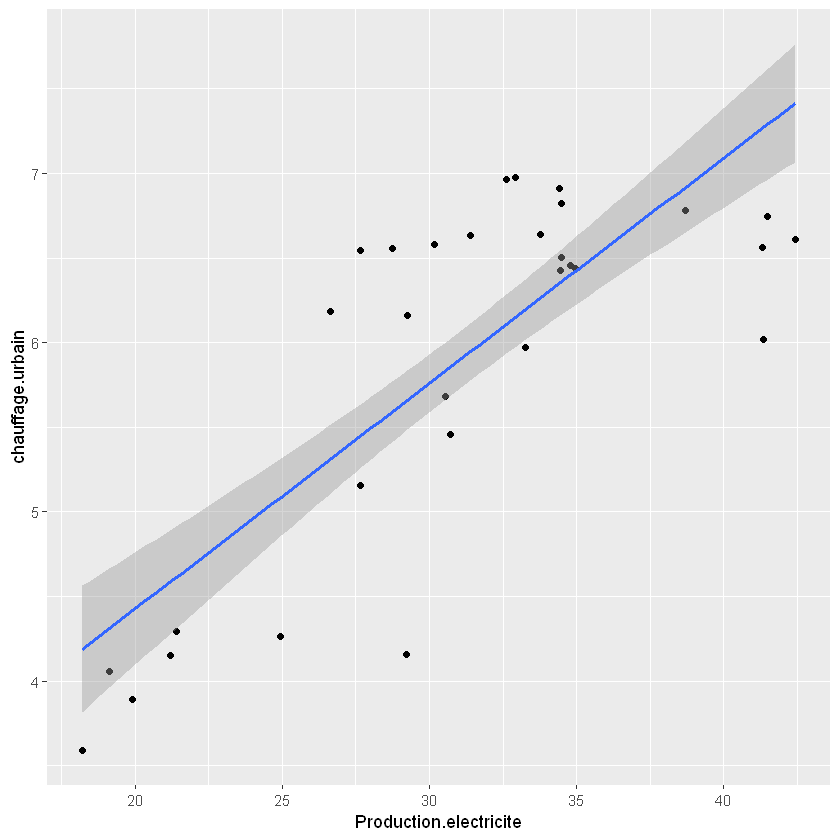

In [74]:
ggplot(data2)+aes(x=Production.electricite , y=chauffage.urbain)+geom_point()+
 geom_smooth( formula = y~x ,method="lm")

In [77]:
regression2.1 = lm(data2$Production.electricite~data2$chauffage.urbain)
summary(regression2.1)


Call:
lm(formula = data2$Production.electricite ~ data2$chauffage.urbain)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4025 -3.0683 -0.7557  1.7623  9.7947 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.8371     2.8083    1.01    0.316    
data2$chauffage.urbain   4.7714     0.4702   10.15 1.48e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.948 on 59 degrees of freedom
Multiple R-squared:  0.6357,	Adjusted R-squared:  0.6296 
F-statistic:   103 on 1 and 59 DF,  p-value: 1.481e-14


In [78]:
Le modèle prédit est assez bon car R-squared ajusté est de  0.6296. 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: Le modèle
       ^


In [ ]:
regression2.2 = lm(data2$Production.electricite~data2$raffinage.petrole)
summary(regression2.2)

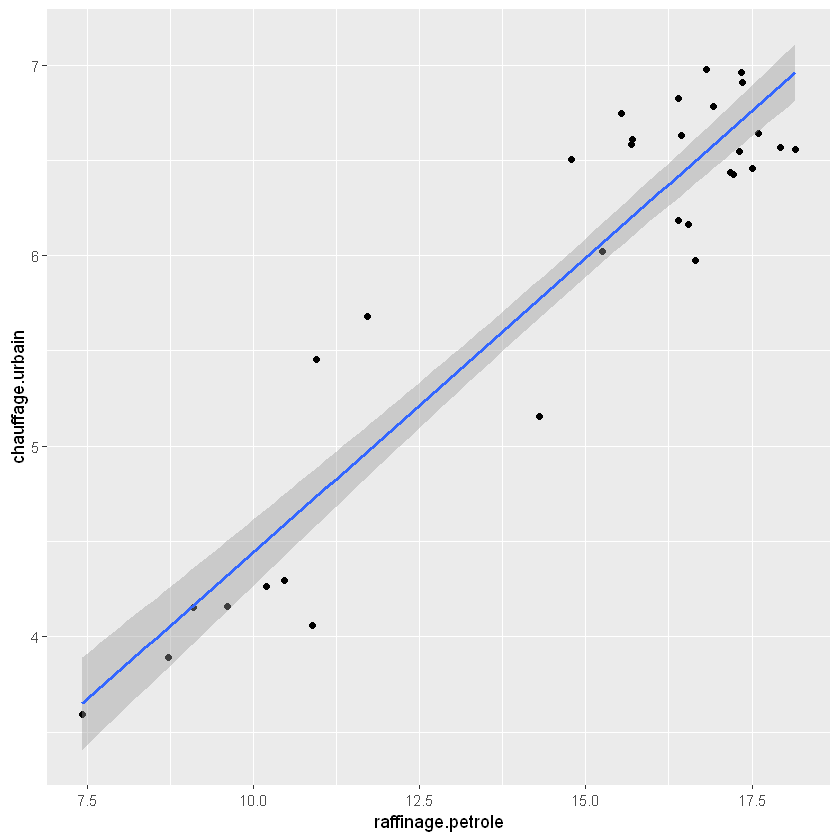

In [79]:
ggplot(data2)+aes(x=raffinage.petrole , y=chauffage.urbain)+geom_point()+
 geom_smooth( formula = y~x ,method="lm")

In [80]:
regression2.3 = lm(data2$chauffage.urbain~data2$raffinage.petrole)
summary(regression2.3)


Call:
lm(formula = data2$chauffage.urbain ~ data2$raffinage.petrole)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6573 -0.2891 -0.1488  0.3810  0.7215 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.3499     0.2309   5.846 2.33e-07 ***
data2$raffinage.petrole   0.3091     0.0154  20.073  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3906 on 59 degrees of freedom
Multiple R-squared:  0.8723,	Adjusted R-squared:  0.8701 
F-statistic: 402.9 on 1 and 59 DF,  p-value: < 2.2e-16


In [81]:
cor.test(data2$raffinage.petrole,data2$chauffage.urbain)


	Pearson's product-moment correlation

data:  data2$raffinage.petrole and data2$chauffage.urbain
t = 20.073, df = 59, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8918996 0.9599953
sample estimates:
      cor 
0.9339551 


### Emissions des gaz à effet de serredans le secteur du Transport

#### Importation de la base de données

In [82]:
data3=read.xlsx("C:/Users/MarieRogerNoahNoah/Documents/Projet IA/Emissions de gaz à effet de serre/secteur_transport.xlsx", sheetIndex = 1, header=TRUE)

In [83]:
head(data3)

Annee,VP.diesel,VP.essence,VP.GPL,VP.GNV,VP.Ã.lectriques,VUL.diesel,VUL.essence,VUL.Ã.lectriques,PL.diesel..y.c..bus.et.cars.,...,Deux.roues.diesel,Deux.roues.Ã.lectriques,sous.total.Transport.routier,Transport.ferroviaire,Transport.fluvial.de.marchandises,Transport.maritime.domestique,Transport.autres.navigations,Transport.aÃ.rien.franÃ.ais,sous.total.Autres.transports,Total.transports..total.national.
1990,14.85332,55.94506,0.15140031,5.130617e-05,0,9.813702,4.382750,0,30.36097,...,0.000000000,0,116.0577,1.0949178,0.12793058,1.721993,0.6644131,3.905902,7.515156,123.5728
1991,16.73721,54.62953,0.14232199,4.337460e-05,0,10.852780,4.189184,0,31.45205,...,0.000000000,0,118.5535,1.0605995,0.14132347,1.878574,0.6834668,4.020839,7.784802,126.3383
1992,18.75343,55.31462,0.12117717,4.636491e-05,0,11.901382,3.755479,0,32.75880,...,0.006072932,0,123.1749,1.0099391,0.14803590,1.713033,0.7029440,4.042567,7.616520,130.7914
1993,20.74399,53.33138,0.10620684,4.067438e-04,0,12.895303,3.236961,0,32.30578,...,0.016555091,0,123.3368,0.9344933,0.09555838,1.916654,0.7360443,4.031388,7.714138,131.0509
1994,22.78051,51.08832,0.09434607,2.237631e-04,0,13.311119,3.175166,0,33.13296,...,0.024757801,0,124.2195,0.8677632,0.09716769,1.825688,0.7516966,4.199581,7.741896,131.9613
1995,25.62631,49.48060,0.07943530,9.354304e-05,0,13.782293,2.670625,0,33.40960,...,0.033053258,0,125.6183,0.8290870,0.09643705,1.766840,0.7894027,4.774470,8.256237,133.8745


In [84]:
colnames(data3) <- c("Annee","VP.diesel","VP.essence","VP.GPL","VP.GNV","VP.electriques","VUL.diesel","VUL.essence","VUL.électriques","PL.diesel(y.c.et.cars)","PL.essence(y.c.bus.et.cars)","PL.GNV(y.c.bus.et.cars)","PL.électriques(y.c.bus.et.cars)","Deux.roues.essence","Deux.roues.diesel","Deux.roues.electriques","sous-total.Transport.routier","Transport.ferroviaire","Transport.fluvial.de.marchandises","Transport.maritime.domestique","Transport.autres.navigations","Transport.aerien.français","sous-total.Autres.transports","Total.secteur")
# le total_secteur est (total.national)

In [85]:
head(data3)

Annee,VP.diesel,VP.essence,VP.GPL,VP.GNV,VP.electriques,VUL.diesel,VUL.essence,VUL.électriques,PL.diesel(y.c.et.cars),...,Deux.roues.diesel,Deux.roues.electriques,sous-total.Transport.routier,Transport.ferroviaire,Transport.fluvial.de.marchandises,Transport.maritime.domestique,Transport.autres.navigations,Transport.aerien.français,sous-total.Autres.transports,Total.secteur
1990,14.85332,55.94506,0.15140031,5.130617e-05,0,9.813702,4.382750,0,30.36097,...,0.000000000,0,116.0577,1.0949178,0.12793058,1.721993,0.6644131,3.905902,7.515156,123.5728
1991,16.73721,54.62953,0.14232199,4.337460e-05,0,10.852780,4.189184,0,31.45205,...,0.000000000,0,118.5535,1.0605995,0.14132347,1.878574,0.6834668,4.020839,7.784802,126.3383
1992,18.75343,55.31462,0.12117717,4.636491e-05,0,11.901382,3.755479,0,32.75880,...,0.006072932,0,123.1749,1.0099391,0.14803590,1.713033,0.7029440,4.042567,7.616520,130.7914
1993,20.74399,53.33138,0.10620684,4.067438e-04,0,12.895303,3.236961,0,32.30578,...,0.016555091,0,123.3368,0.9344933,0.09555838,1.916654,0.7360443,4.031388,7.714138,131.0509
1994,22.78051,51.08832,0.09434607,2.237631e-04,0,13.311119,3.175166,0,33.13296,...,0.024757801,0,124.2195,0.8677632,0.09716769,1.825688,0.7516966,4.199581,7.741896,131.9613
1995,25.62631,49.48060,0.07943530,9.354304e-05,0,13.782293,2.670625,0,33.40960,...,0.033053258,0,125.6183,0.8290870,0.09643705,1.766840,0.7894027,4.774470,8.256237,133.8745


In [86]:
#data3$Annee =as.factor(data3$Annee)
data3$Annee= as.Date(data3$Annee, format="%Y")

In [87]:
str(data3)

'data.frame':	31 obs. of  24 variables:
 $ Annee                            : Date, format: "1990-05-20" "1991-05-20" ...
 $ VP.diesel                        : num  14.9 16.7 18.8 20.7 22.8 ...
 $ VP.essence                       : num  55.9 54.6 55.3 53.3 51.1 ...
 $ VP.GPL                           : num  0.1514 0.1423 0.1212 0.1062 0.0943 ...
 $ VP.GNV                           : num  5.13e-05 4.34e-05 4.64e-05 4.07e-04 2.24e-04 ...
 $ VP.electriques                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VUL.diesel                       : num  9.81 10.85 11.9 12.9 13.31 ...
 $ VUL.essence                      : num  4.38 4.19 3.76 3.24 3.18 ...
 $ VUL.électriques                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PL.diesel(y.c.et.cars)           : num  30.4 31.5 32.8 32.3 33.1 ...
 $ PL.essence(y.c.bus.et.cars)      : num  0.0312 0.0275 0.0266 0.0252 0.0244 ...
 $ PL.GNV(y.c.bus.et.cars)          : num  0.000364 0.00037 0.000368 0.002579 0.001496 ...
 $ PL.électriques(y.c.bus.et.cars) 

In [88]:
summary(data3)

     Annee              VP.diesel       VP.essence        VP.GPL       
 Min.   :1990-05-20   Min.   :14.85   Min.   :18.67   Min.   :0.07944  
 1st Qu.:1997-11-18   1st Qu.:30.11   1st Qu.:20.93   1st Qu.:0.16028  
 Median :2005-05-20   Median :42.76   Median :33.25   Median :0.32006  
 Mean   :2005-05-19   Mean   :40.47   Mean   :34.45   Mean   :0.32409  
 3rd Qu.:2012-11-18   3rd Qu.:51.47   3rd Qu.:46.46   3rd Qu.:0.42808  
 Max.   :2020-05-20   Max.   :56.91   Max.   :55.95   Max.   :0.67532  
     VP.GNV          VP.electriques   VUL.diesel      VUL.essence   
 Min.   :4.337e-05   Min.   :0      Min.   : 9.814   Min.   :1.006  
 1st Qu.:1.690e-04   1st Qu.:0      1st Qu.:15.177   1st Qu.:2.004  
 Median :4.531e-03   Median :0      Median :18.576   Median :2.330  
 Mean   :6.190e-03   Mean   :0      Mean   :17.139   Mean   :2.407  
 3rd Qu.:1.120e-02   3rd Qu.:0      3rd Qu.:19.216   3rd Qu.:2.574  
 Max.   :2.067e-02   Max.   :0      Max.   :21.570   Max.   :4.383  
 VUL.électriq

In [89]:
data3.1 = as.matrix(data3[30,2:16])
table3 =round(prop.table(data3.1)*100,3)
table3.1 = data.frame(
    sous_secteur=c("VP.diesel","VP.essence","VP.GPL","VP.GNV","VP.electriques","VUL.diesel","VUL.essence","VUL.électrique","PL.diesel(y.c.et.cars)","PL.essence(y.c.bus.et.cars)","PL.GNV(y.c.bus.et.cars)","PL.électriques(y.c.bus.et.cars)","Deux.roues.essence","Deux.roues.diesel","Deux.roues.electriques"),
    MtCO2e=c(40.074,17.26,0.133,0.009,0,15.23,1.488,0,24.4,0,0.317,0,1.018,0.071,0)
    )
table3.1

sous_secteur,MtCO2e
VP.diesel,40.074
VP.essence,17.260
VP.GPL,0.133
VP.GNV,0.009
VP.electriques,0.000
VUL.diesel,15.230
VUL.essence,1.488
VUL.électrique,0.000
PL.diesel(y.c.et.cars),24.400
PL.essence(y.c.bus.et.cars),0.000


In [90]:
#création d'un data frame pour l'émission de CO2e pae sous -secteur de transports
data3.2 = as.matrix(data3[30,17:22])
data3.2

,sous-total.Transport.routier,Transport.ferroviaire,Transport.fluvial.de.marchandises,Transport.maritime.domestique,Transport.autres.navigations,Transport.aerien.français
30,127.3364,0.4490311,0.113891,1.551582,1.045036,5.371825


In [91]:
table3.2 =round(prop.table(data3.2)*100,3)
#table3.2 = t(as.data.frame(table3.2,row.names=c("sous-secteur","MtCO2e"))) 
table3.2 = data.frame(
                         sous_secteur=c("Transport.routier","Transport.ferroviaire","Transport.fluvial.de.marchandises","Transport.maritime.domestique","Transport.autres.navigations",
"Transport.aerien.français"), 
                        MtCO2e=c(93.721,0.330,0.084,1.142,0.769,3.954)
)
table3.2

sous_secteur,MtCO2e
Transport.routier,93.721
Transport.ferroviaire,0.330
Transport.fluvial.de.marchandises,0.084
Transport.maritime.domestique,1.142
Transport.autres.navigations,0.769
Transport.aerien.français,3.954


In [92]:
#création d'un data frame avec l''émissions des CO2e dans les sous-secteurs de l'industrie du transport entre 1990 et 2019 
data3.3 = as.matrix(data3[,c(1,17:22)])
data3.3 = data3[,c(1,17:22)]
colnames(data3.3) <- c("Annee","sous.total.Transport.routier","Transport.ferroviaire","Transport.fluvial.de.marchandises","Transport.maritime.domestique","Transport.autres.navigations","Transport.aerien.français")
head(data3.3)

Annee,sous.total.Transport.routier,Transport.ferroviaire,Transport.fluvial.de.marchandises,Transport.maritime.domestique,Transport.autres.navigations,Transport.aerien.français
1990-05-20,116.0577,1.0949178,0.12793058,1.721993,0.6644131,3.905902
1991-05-20,118.5535,1.0605995,0.14132347,1.878574,0.6834668,4.020839
1992-05-20,123.1749,1.0099391,0.14803590,1.713033,0.7029440,4.042567
1993-05-20,123.3368,0.9344933,0.09555838,1.916654,0.7360443,4.031388
1994-05-20,124.2195,0.8677632,0.09716769,1.825688,0.7516966,4.199581
1995-05-20,125.6183,0.8290870,0.09643705,1.766840,0.7894027,4.774470


  #### Visualisation des données

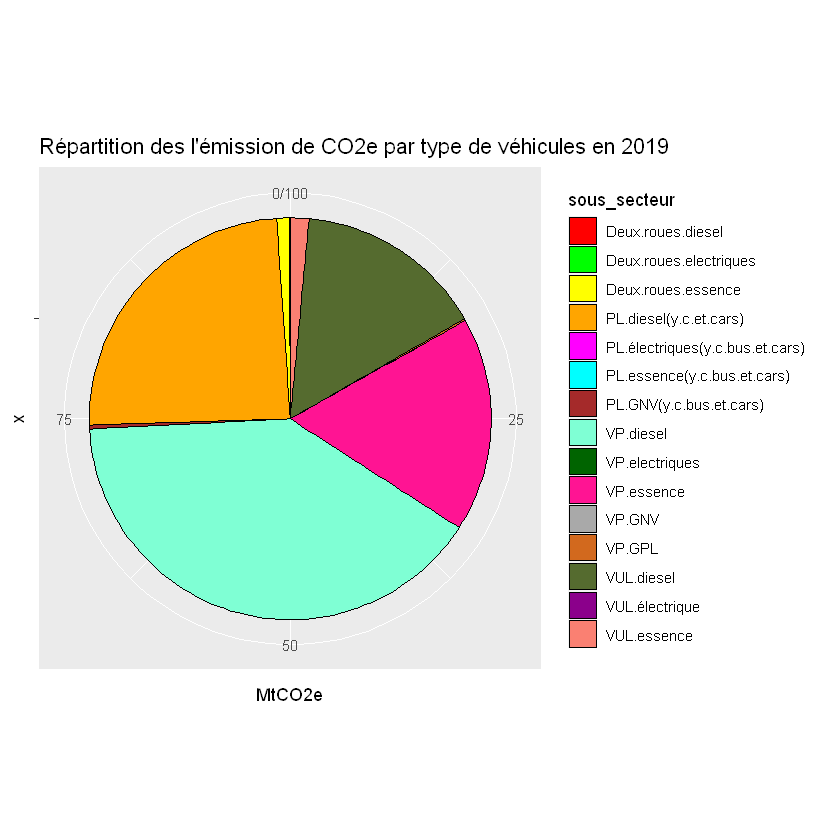

In [93]:
ggplot(table3.1, aes(x="",y=MtCO2e,fill =sous_secteur)) +
  geom_bar(stat="identity", width=1.5,color="black") +
  coord_polar("y", start=0) +
  scale_fill_manual(values = mycolors)+
  ggtitle("Répartition des l'émission de CO2e par type de véhicules en 2019") #+
  #geom_label_repel(data = table3.1,
                   #aes(y=MtCO2e,label = paste0(MtCO2e, "%")),
                   #size = 3, nudge_x = 5, show.legend = TRUE)
  #geom_label_repel(data=table3.1, aes(y = MtCO2e,
   #                      label = glue::glue("{MtCO2e} ({scales::percent(MtCO2e)})"), 
    #                     fill = sous_secteur),
     #                size = 3,
      #               nudge_x = 3,
       #              show.legend = FALSE)
  #geom_text(aes(label = paste0(MtCO2e, "%")), position = position_stack(vjust=0.5)) + labs(x =NULL, y = NULL, fill = NULL) 
  #scale_fill_manual(values = palette_Dark2(14))
  #scale_fill_brewer(palette = 14,"Dark2")
       

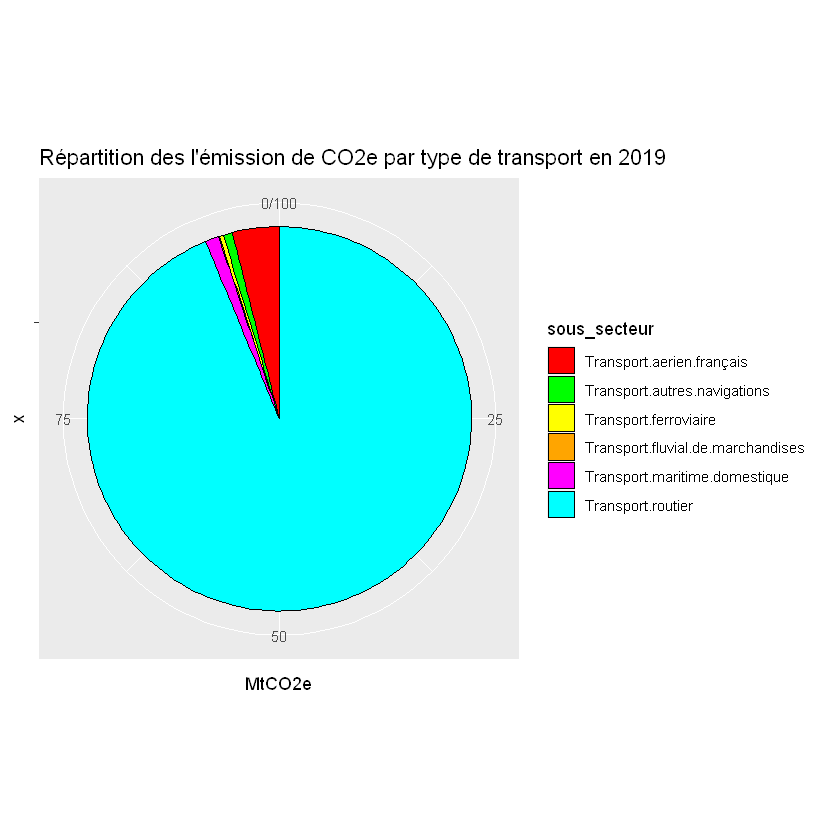

In [94]:
ggplot(table3.2, aes(x="",y=MtCO2e,fill =sous_secteur)) +
  geom_bar(stat="identity", width=1.5,color="black") +
  coord_polar("y", start=0) +
  #scale_fill_brewer("Dark2") +
  scale_fill_manual(values = mycolors)+
  ggtitle("Répartition des l'émission de CO2e par type de transport en 2019") #+ 
 # geom_label_repel(aes(y=MtCO2e, label=paste0(MtCO2e, "%")),
  #                 data = table3.2,
   #                size = 4, nudge_x = 8, show.legend = FALSE)

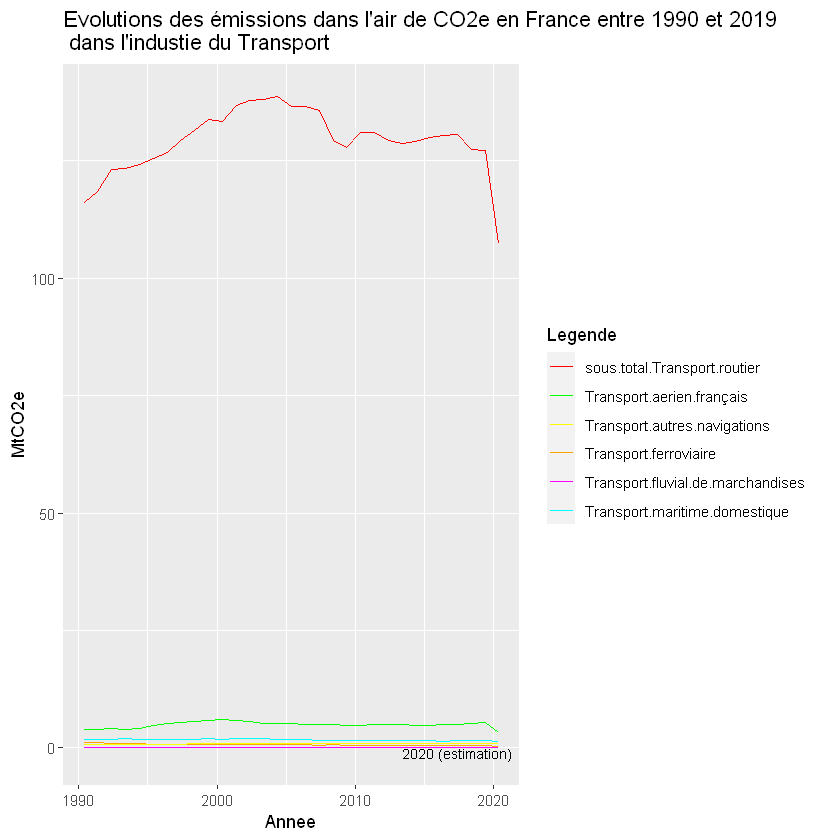

In [95]:
 ggplot(data3.3, aes(x=Annee)) + 
                geom_line(aes(y = sous.total.Transport.routier,colour = "sous.total.Transport.routier")) +
                geom_line(aes(y =Transport.ferroviaire, colour = "Transport.ferroviaire")) +
                geom_line(aes(y = Transport.fluvial.de.marchandises , colour = "Transport.fluvial.de.marchandises")) +
                geom_line(aes(y = Transport.maritime.domestique , colour = "Transport.maritime.domestique"))+
                geom_line(aes(y= Transport.autres.navigations , colour = "Transport.autres.navigations")) +
                geom_line(aes(y= Transport.aerien.français , colour = "Transport.aerien.français ")) +
                ylab("MtCO2e") +
                ggtitle("Evolutions des émissions dans l'air de CO2e en France entre 1990 et 2019 \n dans l'industie du Transport")+
                geom_text(data = NULL, aes(x = Annee[28], y = -1, label = "2020 (estimation)"),size=3) +
                scale_color_manual(name="Legende",values = mycolors) 
                #labs(color = "Legende") 
                #scale_color_manual(values = colors)              

### Emissions des gaz à effet de serre dans le secteur d'Usage des bâtiments et activités résidentiels/tertiaires

#### Importation des données

In [96]:
data4 = read.xlsx("C:/Users/MarieRogerNoahNoah/Documents/Projet IA/Emissions de gaz à effet de serre/secteur_usage_des_bâtiments_et_activités_résidentiels_tertiaires.xlsx", sheetIndex = 1, header=TRUE)

In [97]:
head(data4)

Annee,Chauffage..eau.chaude.sanitaire.et.cuisson.domestique,Climatisation.domestique,RÃ.frigÃ.ration.domestique,Utilisation.de.produits.domestiques..y.c..peintures..aÃ.rosols.,Engins..y.c..jardinage..domestiques,DÃ.chets.et.brÃ.lage.domestiques.et.eaux.usÃ.es,Autres.activitÃ.s.domestiques..tabac.et.feux.dâ..artifices.,sous.total.Usage.des.bÃ.timents.rÃ.sidentiels.et.activitÃ.s.domestiques,Chauffage..eau.chaude.sanitaire.et.cuisson.tertiaire,Climatisation.tertiaire,RÃ.frigÃ.ration.tertiaire,Utilisation.de.produits.tertiaires..y.c..solvants..peintures..aÃ.rosols..anesthÃ.sie.,Autres.activitÃ.s.tertiaires..y.c..feux.dâ..artifices..activitÃ.s.militaires..crÃ.mation.,sous.total.Usage.des.bÃ.timents.tertiaires.et.activitÃ.s.tertiaires,Total.Usage.des.bÃ.timents.et.activitÃ.s.rÃ.sidentiels.tertiaires
1990,57.93561,0,0.000000e+00,0.5908319,0.3043401,1.768333,0,60.59911,26.36998,0.0000000000,0.00000000,0.1600136,4.5190557,31.04905,91.64817
1991,65.44528,0,0.000000e+00,0.5922273,0.3038066,1.847774,0,68.18909,28.59990,0.0000000000,0.00000000,0.1565320,4.1612879,32.91772,101.10681
1992,64.29549,0,0.000000e+00,0.5963998,0.3033750,1.918532,0,67.11380,27.16723,0.0004931448,0.00000000,0.1549597,2.8431152,30.16580,97.27959
1993,62.43144,0,0.000000e+00,0.5905227,0.3027478,1.991854,0,65.31656,25.83523,0.0025448711,0.01506607,0.1525237,2.3762248,28.38159,93.69815
1994,58.58816,0,2.406141e-05,0.6397844,0.3023357,2.064415,0,61.59472,24.34463,0.0073336261,0.04391767,0.2754963,1.1007945,25.77217,87.36689
1995,58.20838,0,6.836572e-05,0.8792071,0.3020707,2.142500,0,61.53222,24.54123,0.0131750231,0.11531552,0.4569313,0.6128363,25.73949,87.27171


In [98]:
colnames(data4) <- c("Annee","chauffage.eau.chaude\nsanitaire.cuisson.domestique","Climatisation.domestique","Réfrigération.domestique","Utilistion.produits\ndomestiques","Engins.domestiques","Déchêts.brûlage.domestique\neaux.usées","Autres.activités.domestiques","sous-totale.usage.bâtiments.activités.domestique","Chauffage.eau.chaude\nsanitaire.cuisson.tertiaire","Climatisation.tertiaire","Réfrigération.tertiaire","Utilisation.de.produit.tertiaire","Autres.activités.tertiaire","sous-total.Usage.bâtiments.tertiaires.activités.tertiaires","Total.secteur")

In [99]:
head(data4)

Annee,chauffage.eau.chaude sanitaire.cuisson.domestique,Climatisation.domestique,Réfrigération.domestique,Utilistion.produits domestiques,Engins.domestiques,Déchêts.brûlage.domestique eaux.usées,Autres.activités.domestiques,sous-totale.usage.bâtiments.activités.domestique,Chauffage.eau.chaude sanitaire.cuisson.tertiaire,Climatisation.tertiaire,Réfrigération.tertiaire,Utilisation.de.produit.tertiaire,Autres.activités.tertiaire,sous-total.Usage.bâtiments.tertiaires.activités.tertiaires,Total.secteur
1990,57.93561,0,0.000000e+00,0.5908319,0.3043401,1.768333,0,60.59911,26.36998,0.0000000000,0.00000000,0.1600136,4.5190557,31.04905,91.64817
1991,65.44528,0,0.000000e+00,0.5922273,0.3038066,1.847774,0,68.18909,28.59990,0.0000000000,0.00000000,0.1565320,4.1612879,32.91772,101.10681
1992,64.29549,0,0.000000e+00,0.5963998,0.3033750,1.918532,0,67.11380,27.16723,0.0004931448,0.00000000,0.1549597,2.8431152,30.16580,97.27959
1993,62.43144,0,0.000000e+00,0.5905227,0.3027478,1.991854,0,65.31656,25.83523,0.0025448711,0.01506607,0.1525237,2.3762248,28.38159,93.69815
1994,58.58816,0,2.406141e-05,0.6397844,0.3023357,2.064415,0,61.59472,24.34463,0.0073336261,0.04391767,0.2754963,1.1007945,25.77217,87.36689
1995,58.20838,0,6.836572e-05,0.8792071,0.3020707,2.142500,0,61.53222,24.54123,0.0131750231,0.11531552,0.4569313,0.6128363,25.73949,87.27171


In [100]:
data4$Annee = as.Date(data4$Annee, format="%Y")

In [101]:
str(data4)

'data.frame':	31 obs. of  16 variables:
 $ Annee                                                     : Date, format: "1990-05-20" "1991-05-20" ...
 $ chauffage.eau.chaude
sanitaire.cuisson.domestique        : num  57.9 65.4 64.3 62.4 58.6 ...
 $ Climatisation.domestique                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Réfrigération.domestique                                  : num  0.00 0.00 0.00 0.00 2.41e-05 ...
 $ Utilistion.produits
domestiques                          : num  0.591 0.592 0.596 0.591 0.64 ...
 $ Engins.domestiques                                        : num  0.304 0.304 0.303 0.303 0.302 ...
 $ Déchêts.brûlage.domestique
eaux.usées                    : num  1.77 1.85 1.92 1.99 2.06 ...
 $ Autres.activités.domestiques                              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sous-totale.usage.bâtiments.activités.domestique          : num  60.6 68.2 67.1 65.3 61.6 ...
 $ Chauffage.eau.chaude
sanitaire.cuisson.tertiaire         : num  26.4 28.6 

In [102]:
summary(data4)

     Annee            chauffage.eau.chaude\nsanitaire.cuisson.domestique
 Min.   :1990-05-20   Min.   :38.70                                     
 1st Qu.:1997-11-18   1st Qu.:52.70                                     
 Median :2005-05-20   Median :59.99                                     
 Mean   :2005-05-19   Mean   :56.78                                     
 3rd Qu.:2012-11-18   3rd Qu.:62.81                                     
 Max.   :2020-05-20   Max.   :66.55                                     
 Climatisation.domestique Réfrigération.domestique
 Min.   :0.0000           Min.   :0.000000        
 1st Qu.:0.0000           1st Qu.:0.000164        
 Median :0.1739           Median :0.057582        
 Mean   :0.3887           Mean   :0.063741        
 3rd Qu.:0.7075           3rd Qu.:0.108454        
 Max.   :1.2348           Max.   :0.175778        
 Utilistion.produits\ndomestiques Engins.domestiques
 Min.   :0.5905                   Min.   :0.2412    
 1st Qu.:1.1365           

In [103]:
# suppression de la colonne Autres.activités.domestiques car contient des valeurs nulles
data4.1 = data4[30,1:7] 
head(data4.1)

,Annee,chauffage.eau.chaude sanitaire.cuisson.domestique,Climatisation.domestique,Réfrigération.domestique,Utilistion.produits domestiques,Engins.domestiques,Déchêts.brûlage.domestique eaux.usées
30,2019-05-20,40.98123,1.234811,0.09046791,0.9770707,0.2798087,2.493569


In [104]:
table4 = round(prop.table(data4.1[,-1])*100,3)# calcul de la proportion de chaque activité en 2019
table4

,chauffage.eau.chaude sanitaire.cuisson.domestique,Climatisation.domestique,Réfrigération.domestique,Utilistion.produits domestiques,Engins.domestiques,Déchêts.brûlage.domestique eaux.usées
30,88.979,2.681,0.196,2.121,0.608,5.414


In [105]:
table4.1 = data.frame(
                        Activités=c("chauffage.eau.chaude\nsanitaire.cuisson.domestique","Climatisation.domestique","Réfrigération.domestique","Utilistion.produits.domestiques",
"Engins.domestiques","Déchêts.brûlage.domestique\neaux.usées"), 
                        MtCO2e=c(88.979,2.681,0.196,2.121,0.608,5.414)
)
table4.1

Activités,MtCO2e
chauffage.eau.chaude sanitaire.cuisson.domestique,88.979
Climatisation.domestique,2.681
Réfrigération.domestique,0.196
Utilistion.produits.domestiques,2.121
Engins.domestiques,0.608
Déchêts.brûlage.domestique eaux.usées,5.414


In [106]:
data4.1 = data4[30,10:14] 
head(data4.1)

,Chauffage.eau.chaude sanitaire.cuisson.tertiaire,Climatisation.tertiaire,Réfrigération.tertiaire,Utilisation.de.produit.tertiaire,Autres.activités.tertiaire
30,21.37572,1.970495,3.772061,0.2532874,1.624589


In [107]:
table4.2 = round(prop.table(data4.1)*100,3)
head(table4.2)

,Chauffage.eau.chaude sanitaire.cuisson.tertiaire,Climatisation.tertiaire,Réfrigération.tertiaire,Utilisation.de.produit.tertiaire,Autres.activités.tertiaire
30,73.719,6.796,13.009,0.874,5.603


In [108]:
table4.2 = data.frame(
                        Activités = c("Chauffage.eau.chaude\nsanitaire.cuisson.tertiaire","Climatisation.tertiaire","Réfrigération.tertiaire","Utilisation.de.produit\ntertiaire","Autres.activités.tertiaire"),
                        MtCO2e = c(73.719,6.796,13.009,0.874,5.603)
)
table4.2

Activités,MtCO2e
Chauffage.eau.chaude sanitaire.cuisson.tertiaire,73.719
Climatisation.tertiaire,6.796
Réfrigération.tertiaire,13.009
Utilisation.de.produit tertiaire,0.874
Autres.activités.tertiaire,5.603


In [109]:
#
data4.3 = data4[,c(1,9,15)]
head(data4.3)

Annee,sous-totale.usage.bâtiments.activités.domestique,sous-total.Usage.bâtiments.tertiaires.activités.tertiaires
1990-05-20,60.59911,31.04905
1991-05-20,68.18909,32.91772
1992-05-20,67.11380,30.16580
1993-05-20,65.31656,28.38159
1994-05-20,61.59472,25.77217
1995-05-20,61.53222,25.73949


In [110]:
#colnames(data4.3) <- c("Annee", "sous.totale.usage.bâtiments.activités.domestique","sous.total.Usage.bâtiments.tertiaires.activités.tertiaires")

In [111]:
colnames(data4.3) <- c("Annee", "Usage.bâtiments.activités.domestique","Usage.bâtiments.tertiaires.activités.tertiaires")

#### Visualisation des données

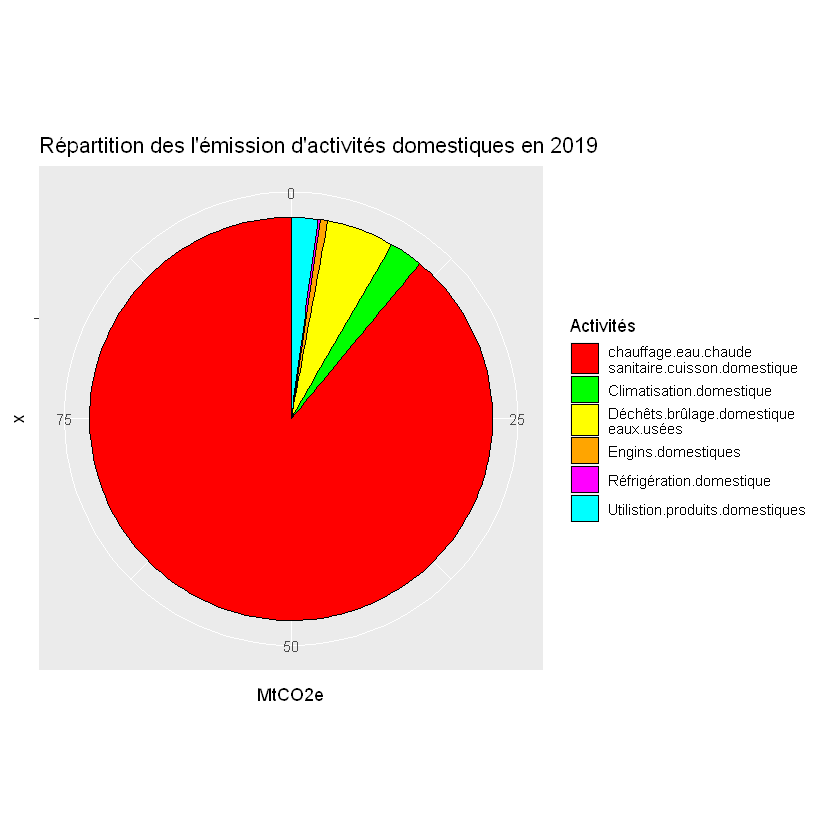

In [112]:
ggplot(table4.1, aes(x="",y=MtCO2e,fill = Activités)) +
  geom_bar(stat="identity", width=1.5,color="black") +
  coord_polar("y", start=0) +
  #scale_fill_brewer("Dark2") +
  scale_fill_manual(values = mycolors)+
  ggtitle("Répartition des l'émission d'activités domestiques en 2019") #+ 
 # geom_label_repel(aes(y=MtCO2e, label=paste0(MtCO2e, "%")),
  #                 data = table3.2,
   #                size = 4, nudge_x = 8, show.legend = FALSE)

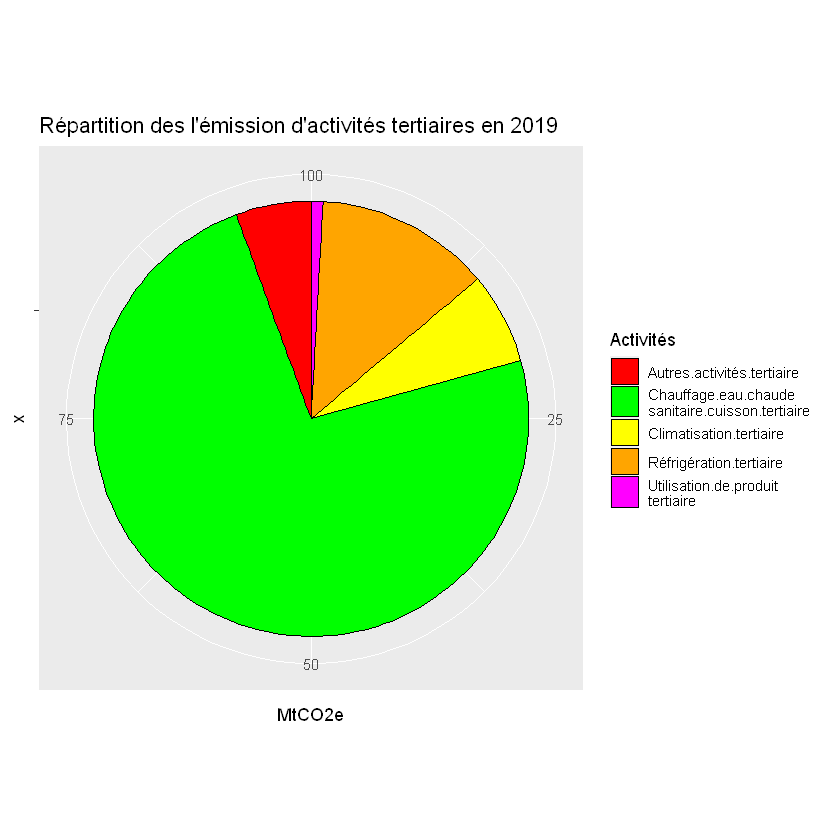

In [113]:
ggplot(table4.2, aes(x="",y=MtCO2e,fill = Activités)) +
  geom_bar(stat="identity", width=1.5,color="black") +
  coord_polar("y", start=0) +
  #geom_text(aes(label = paste0(MtCO2e, "%")), position = position_stack(vjust=0.65)) + labs(x =NULL, y = NULL, fill = NULL) +
  #scale_fill_brewer("Dark2") +
  scale_fill_manual(values = mycolors)+
  ggtitle("Répartition des l'émission d'activités tertiaires en 2019")